## Aryo Adi Putro - 2341720084
## TI-3G

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Jumlah cluster yang terbentuk: 2
Banyaknya noise: 2


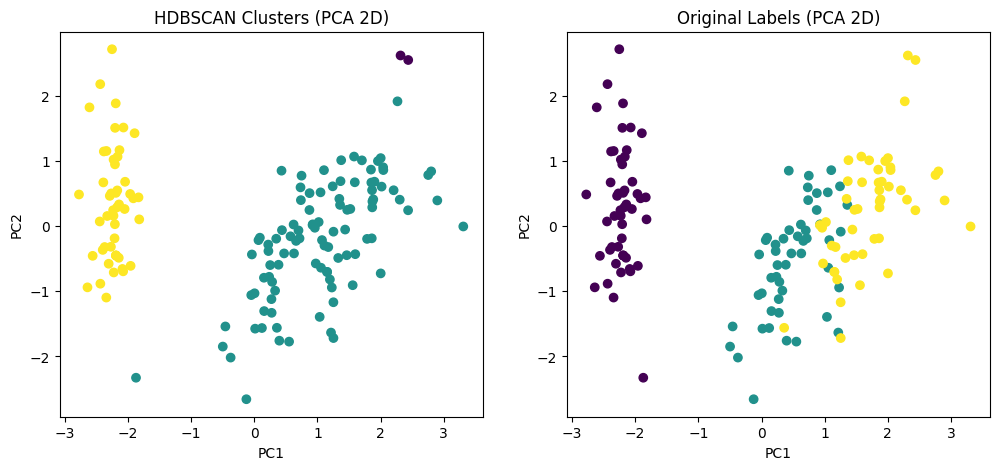

Adjusted Rand Index (kesesuaian dengan label asli): 0.54
Analisis singkat: Jika ARI mendekati 1, clustering sangat sesuai dengan label asli. Pada dataset Iris, HDBSCAN biasanya menemukan 2 cluster utama karena Iris-versicolor dan Iris-virginica memiliki overlap, sementara Iris-setosa terpisah jelas. Ini tidak sepenuhnya sesuai dengan 3 label asli, tapi mencerminkan struktur densitas data.


In [2]:
# Install library yang diperlukan
%pip install hdbscan scikit-learn

import pandas as pd
import io
import hdbscan
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score  # Untuk mengukur kesesuaian dengan label asli

df = pd.read_csv('Iris.csv') # Read from the file path

# Pisahkan fitur dan label
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})  # Untuk perbandingan

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering dengan HDBSCAN (parameter default: min_cluster_size=5, min_samples=5)
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)
labels = clusterer.fit_predict(X_scaled)

# Hitung jumlah cluster (abaikan noise label -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Jumlah cluster yang terbentuk: {n_clusters}")
print(f"Banyaknya noise: {n_noise}")

# Reduksi dimensi dengan PCA untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi cluster HDBSCAN
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('HDBSCAN Clusters (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Visualisasi label asli untuk perbandingan
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('Original Labels (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

# Analisis kesesuaian (menggunakan Adjusted Rand Index)
ari = adjusted_rand_score(y, labels)
print(f"Adjusted Rand Index (kesesuaian dengan label asli): {ari:.2f}")
print("Analisis singkat: Jika ARI mendekati 1, clustering sangat sesuai dengan label asli. Pada dataset Iris, HDBSCAN biasanya menemukan 2 cluster utama karena Iris-versicolor dan Iris-virginica memiliki overlap, sementara Iris-setosa terpisah jelas. Ini tidak sepenuhnya sesuai dengan 3 label asli, tapi mencerminkan struktur densitas data.")